In [ ]:
! git clone https://github.com/a-pt/imageset.git

Cloning into 'imageset'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 55 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (55/55), done.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image

In [ ]:
train_set = []
path_train='/content/imageset/Dataset_img/train'
for filename in os.listdir(path_train):
  tg = Image.open(os.path.join(path_train,filename)).convert('LA')
  #fr = img.imread(os.path.join(path_train,filename))
  train_set.append(tg)
len(train_set)

40

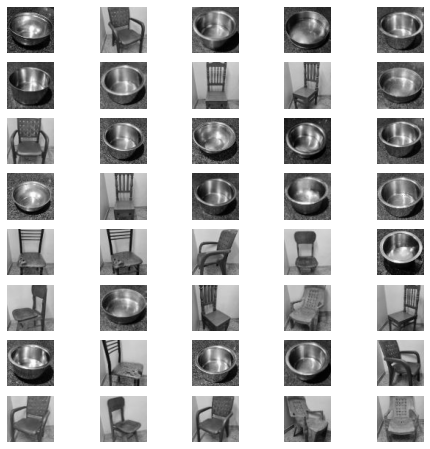

In [ ]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 8
for i in range(1, columns*rows +1):
    tg=train_set[i-1]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(tg)
plt.show()

In [ ]:
cat_1=[0,2,3,4,5,6,9,11,12,13,14,15,17,18,19,24,26,30,32,33]
cat_2=[1,7,8,10,16,20,21,22,23,25,27,28,29,31,34,35,36,37,38,39]

In [ ]:
arr = np.array(train_set[0])
sh = arr.shape
sh

(64, 64, 2)

In [ ]:
df=[]
for i in range (0,len(train_set)):
  arr = np.array(train_set[i])
  flat_arr = arr.ravel()
  df.append(flat_arr.tolist())

In [ ]:
X=np.transpose(df)
print (np.shape(X))
X

(8192, 40)


array([[ 41, 157, 100, ..., 170, 111, 153],
       [255, 255, 255, ..., 255, 255, 255],
       [ 52, 172, 103, ..., 165, 100, 171],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [ 66, 166,  64, ..., 130, 129, 156],
       [255, 255, 255, ..., 255, 255, 255]])

(40, 8192)
[127.625 255.    125.675 ... 255.    107.8   255.   ]


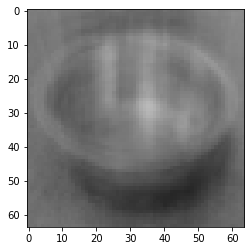

In [ ]:
df=np.transpose(X)
print (np.shape(df))
avg_v=np.mean(df,axis=0)
avg = np.full(df.shape,avg_v)
print (avg_v)
arr = avg_v.reshape(sh)
im2 = Image.fromarray(arr.astype(np.uint8))
plt.imshow(im2)

In [ ]:
df=np.subtract(df,avg)
X=np.transpose(df)
print (np.shape(X))
n=len(X)

(8192, 40)


In [ ]:
cov=np.cov(X)
print (np.shape(cov))

(8192, 8192)


In [ ]:
from scipy.linalg import eigh
e_val, e_vec = eigh(cov)
id=np.argsort(e_val)[::-1]
e_val=e_val[id]
e_vec=e_vec[:,id]

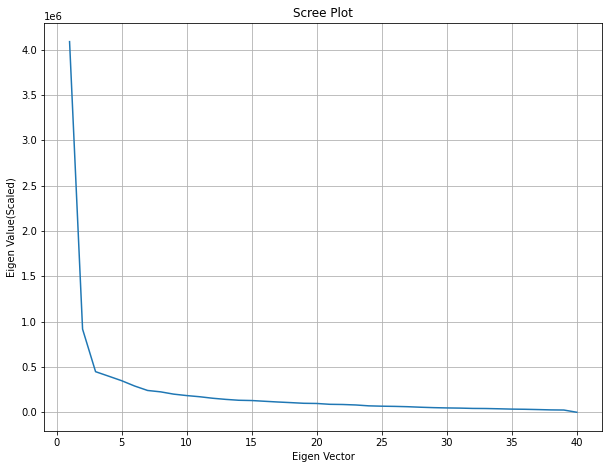

In [ ]:
x=np.arange(1,41)
plt.figure(figsize=(10,7.5))
plt.title('Scree Plot')
plt.plot(x,e_val[0:40])
plt.xlabel('Eigen Vector')
plt.ylabel('Eigen Value(Scaled)')
plt.grid(True)
plt.show()

In [ ]:
prop_of_var=[]
sum=0
for i in range(0,len(e_val)):
 sum=sum+e_val[i]
 prop_of_var.append(sum/np.sum(e_val))

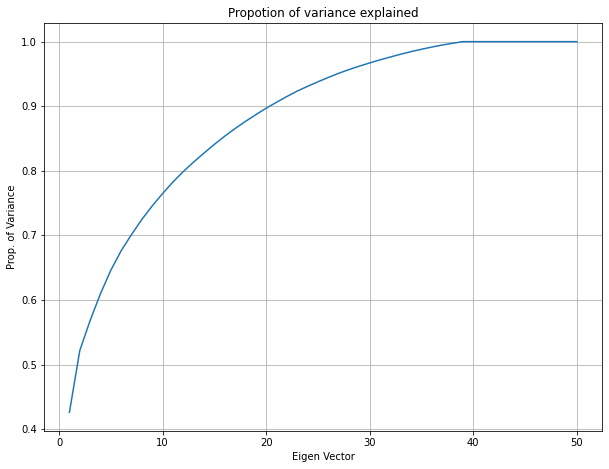

In [ ]:
x=np.arange(1,51)
plt.figure(figsize=(10,7.5))
plt.title('Propotion of variance explained')
plt.plot(x,prop_of_var[0:50])
plt.xlabel('Eigen Vector')
plt.ylabel('Prop. of Variance')
plt.grid(True)
plt.show()

In [ ]:
K=1.00
p=int(K*len(e_val))
W=np.column_stack([e_vec[:, i] for i in range(p)]) 
np.shape(W)

(8192, 8192)

In [ ]:
#Projection of all train images on to the top K% of Eigen vectors
Z_train=np.matmul(W.T,X)
np.shape(Z_train)

(8192, 40)

In [ ]:
test_set_g = []
path_train='/content/imageset/Dataset_img/test'
for filename in os.listdir(path_train):
  tg = Image.open(os.path.join(path_train,filename)).convert('LA')
  test_set_g.append(tg)
len(test_set_g)

10

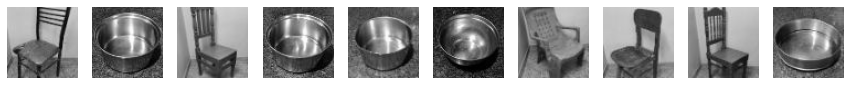

In [ ]:
w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 10
rows = 1
for i in range(1, columns*rows +1):
    tg=test_set_g[i-1]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(tg)
plt.show()

In [ ]:
#Projection of Test(greyscale) to K% of Eigen vectors
test_g=[]
for i in range (0,len(test_set_g)):
  arr = np.array(test_set_g[i])
  flat_arr = arr.ravel()
  test_g.append(flat_arr.tolist())

In [ ]:
X_tg=np.transpose(test_g)
print (np.shape(X_tg))
X_tg

(8192, 10)


array([[197,  73, 162, ..., 199, 163,  81],
       [255, 255, 255, ..., 255, 255, 255],
       [196,  76, 165, ..., 199, 161,  74],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [142,  55, 152, ..., 150, 147, 105],
       [255, 255, 255, ..., 255, 255, 255]])

(10, 8192)
[119.9 255.  117.5 ... 255.  107.9 255. ]


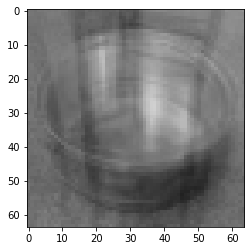

In [ ]:
df=np.transpose(X_tg)
print (np.shape(df))
avg_v=np.mean(df,axis=0)
avg = np.full(df.shape,avg_v)
print (avg_v)
arr = avg_v.reshape(sh)
im2 = Image.fromarray(arr.astype(np.uint8))
plt.imshow(im2)

In [ ]:
df=np.subtract(df,avg)
X_tg=np.transpose(df)
print (np.shape(X_tg))
n=len(X_tg)

(8192, 10)


In [ ]:
#Projection of all test image(grey scale) on to the top K% of Eigen vectors
Z_testg=np.matmul(W.T,X_tg)
np.shape(Z_testg)

(8192, 10)

In [ ]:
trcnt=len(Z_train.T)
tscnt=len(Z_testg.T)
res=[]
for i in range (tscnt):
  dist=[]
  for j in range (trcnt):
    diff=Z_testg[:,i]-Z_train[:,j]
    st=0
    for k in range (p):
      st=st+(diff[k]**2)
    dist.append(np.sqrt(st))
  res.append(dist)
print (np.shape(res))
print (cat_1)
print (cat_2)

(10, 40)
[0, 2, 3, 4, 5, 6, 9, 11, 12, 13, 14, 15, 17, 18, 19, 24, 26, 30, 32, 33]
[1, 7, 8, 10, 16, 20, 21, 22, 23, 25, 27, 28, 29, 31, 34, 35, 36, 37, 38, 39]


In [ ]:
from pandas import DataFrame
DataFrame (res,columns=np.arange(0,40))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,5774.692817,4163.141791,5231.879689,5653.667339,5124.240166,5644.257535,4847.386262,3401.917970,3121.609076,4991.662266,3865.575872,5118.493414,4919.265862,6180.915290,5177.564126,4687.442168,3290.026417,5573.530912,5073.684389,4976.484957,3694.098067,3829.975917,3355.160596,4110.081784,5522.561840,3105.414767,4986.610470,4243.718102,2871.451815,3565.820772,5250.314355,4266.475287,4971.104930,5500.147682,4670.909802,2948.137611,4045.078463,3181.705019,4381.380898,3163.924545
1,2928.778436,5058.961512,2568.799540,3496.091586,2710.091009,2610.197143,2103.251667,5551.826175,5174.889296,2391.029940,5078.401601,2529.583133,2526.821843,2988.341986,2650.804835,2945.923976,5201.719891,2539.324088,2579.871949,2418.837433,5370.665557,5021.090870,5122.398523,6352.998054,3798.364289,5507.986281,2571.282554,4874.356709,4217.035870,4476.247064,3099.728508,5092.314933,2621.996992,2918.679586,4731.418432,4899.282333,5677.461385,4832.211380,4113.595821,4454.943830
2,5659.645689,2930.517663,4747.390154,5270.569663,4827.822436,5424.093042,4584.983072,3043.119464,3296.190745,4461.943565,2968.795551,4844.803920,4668.900601,5951.400510,4916.576499,4492.369339,2741.622882,5297.700730,5034.107217,4744.132874,3011.255008,3342.737759,4019.548834,3058.737399,5323.878048,4146.541339,4396.469740,2640.928156,3475.744485,3963.550930,4921.069297,3630.036305,4677.507715,5126.744457,3505.282096,3579.806919,2569.877424,3962.376941,3312.950162,2923.012269
3,3076.262542,4911.982866,2285.733400,3349.479135,2645.818848,2593.242223,2293.053352,5423.881080,5135.345492,2324.826934,4992.306974,2479.036290,2494.857656,3045.483529,2850.515809,3048.849976,5162.057141,2513.113791,2935.832995,2424.317352,5251.216490,4925.139554,5216.936527,6222.504188,3864.517224,5570.963559,2292.253929,4781.423368,4240.637408,4594.251612,3012.134945,5080.547360,2523.597497,2635.204854,4640.243364,4893.911470,5534.516047,4839.533131,4099.960082,4387.237015
4,3150.054321,4454.993230,2828.341241,3792.315319,2418.133655,2550.221995,2318.048463,5055.671763,4696.438898,2346.284568,4497.802566,2554.467836,2843.118662,3283.557358,2369.035115,2711.166755,4805.205191,2449.399503,2391.875911,2705.007509,4759.771804,4540.243234,4733.376567,5644.344194,4103.211958,4936.624350,2603.949515,4577.484290,3844.104138,4093.139977,2928.088101,4763.582525,2549.732010,3242.927323,4316.867785,4399.254082,5128.414460,4397.539076,3954.337071,4029.255220
5,2665.971638,5944.785213,3162.171204,3440.520604,3155.489966,2896.592615,3296.684884,6451.004691,6036.914185,3288.386812,5872.499679,2925.291520,3168.641708,2751.751710,3216.487824,3540.735478,6167.540310,2613.830996,3125.912815,3264.999874,6285.550427,5919.176562,5966.967427,7361.269586,3894.303908,6389.572953,3552.877373,5993.382932,5031.857627,5326.926264,3360.550323,6374.237603,3365.981265,2990.223432,5641.360831,5719.120302,6908.442330,5541.211102,5174.235811,5353.181313
6,4576.527032,2775.470793,3923.252939,4561.382787,3684.183739,4449.071777,3554.367753,3529.235388,3491.178852,3534.090650,3194.842621,3832.005138,3962.759288,5016.008411,3993.391144,3596.464462,3156.640679,4295.468470,3960.158813,3641.661307,3549.145964,3425.582005,3820.638059,3931.410030,4650.314164,4263.530395,3673.285250,3169.598062,3241.845474,3671.600240,4170.691714,3608.878486,3618.248302,4254.963816,3087.074817,3398.614118,3651.460300,3659.479659,2381.857915,2763.512814
7,6227.812355,4333.580872,5864.285180,6450.044029,5532.350936,6180.224326,5451.254826,3344.057038,2887.195322,5701.347716,3929.436400,5618.860420,5588.631874,6801.783694,5703.695282,5256.116216,3481.981824,6074.448158,5597.735870,5579.697494,3512.444466,3863.293042,3381.271688,3769.619328,5990.628421,2739.345264,5717.373486,4801.983228,3261.167755,3615.764563,5592.276498,4866.072027,5545.626369,6117.117632,5058.766053,3146.420025,4313.931777,3285.114066,4924.847224,3482.324242
8,5451.546824,3137.805160,4657.68

In [ ]:
avg_dist_cat1=[]
avg_dist_cat2=[]

for k in range (0,tscnt):
  sum_cat1=0
  for i in cat_1:
    sum_cat1=sum_cat1+res[k][i]
  avg_dist_cat1.append(sum_cat1/len(cat_1))

for k in range (0,tscnt):
  sum_cat2=0
  for i in cat_2:
    sum_cat2=sum_cat2+res[k][i]
  avg_dist_cat2.append(sum_cat2/len(cat_2))
result=[]
result.append(avg_dist_cat1)
result.append(avg_dist_cat2)
#print(np.transpose(result))
DataFrame(np.transpose(result),columns=['Vessel','Chair'])

,Vessel,Chair
0,5260.295323,3663.780229
1,2749.890025,5040.490276
2,4968.605428,3306.131617
3,2734.406614,4995.229736
4,2806.946856,4581.422521
5,3183.870297,5972.961857
6,4047.414848,3388.579834
7,5829.565539,3799.930810
8,4853.925313,3384.389392
9,2973.099754,4538.188934
